#### **LOADING IMAGE FILE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from skimage.io import imread
from skimage import color
import matplotlib.pyplot as plt

fig0 , ax0 = plt.subplots()

fig0.set_size_inches(20, 20)

image=imread('/content/drive/MyDrive/MAJOR_PROJECT/ECG_IMAGES_DATASET/ECG Images of Myocardial Infarction Patients (240x12=2880)/MI(1).jpg')

ax0.imshow(image)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### **DIVIDING AN ECG INTO LEADS FOR PROCESSING**

In [ ]:
#dividing the ECG leads from 1-13 from the above image
Lead_1 = image[300:600, 150:643]
Lead_2 = image[300:600, 646:1135]
Lead_3 = image[300:600, 1140:1625]
Lead_4 = image[300:600, 1630:2125]
Lead_5 = image[600:900, 150:643]
Lead_6 = image[600:900, 646:1135]
Lead_7 = image[600:900, 1140:1625]
Lead_8 = image[600:900, 1630:2125]
Lead_9 = image[900:1200, 150:643]
Lead_10 = image[900:1200, 646:1135]
Lead_11 = image[900:1200, 1140:1625]
Lead_12 = image[900:1200, 1630:2125]
Lead_13 = image[1250:1480, 150:2125]

Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]

In [ ]:
from skimage.segmentation import slic
from skimage.color import label2rgb

#plotting lead 1-12
fig , ax = plt.subplots(4,3)

fig.set_size_inches(20, 20)

x_counter=0
y_counter=0


for x,y in enumerate(Leads[:len(Leads)-1]):
  if (x+1)%3==0:
    ax[x_counter][y_counter].imshow(y)
    ax[x_counter][y_counter].axis('off')
    ax[x_counter][y_counter].set_title("Leads {}".format(x+1))
    x_counter+=1
    y_counter=0
  else:
    ax[x_counter][y_counter].imshow(y)
    ax[x_counter][y_counter].axis('off')
    ax[x_counter][y_counter].set_title("Leads {}".format(x+1))
    y_counter+=1

#plot the image
plt.show()

Output hidden; open in https://colab.research.google.com to view.

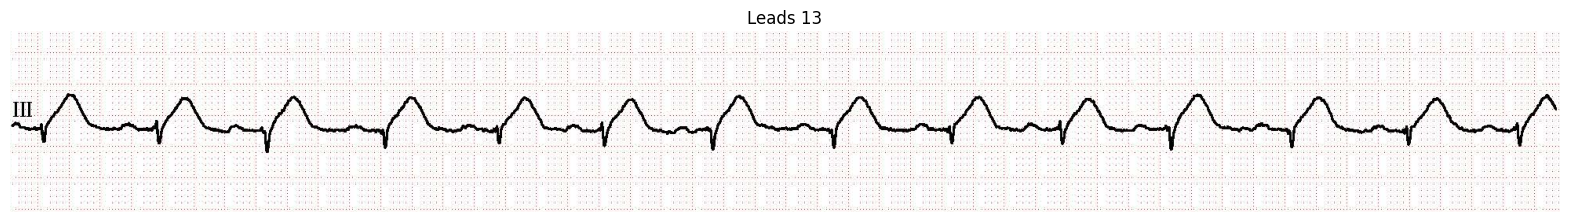

In [ ]:
#plotting lead 13
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(20, 20)

ax1.imshow(Lead_13)
ax1.set_title("Leads 13")
ax1.axis('off')
plt.show()

#### **TRANSFORMAING ECG IMAGES: REMOVING GRIDLINES/ PERFROM THRESHOLDING,  BINARIZATION, GAUSSIAN FILTERING**

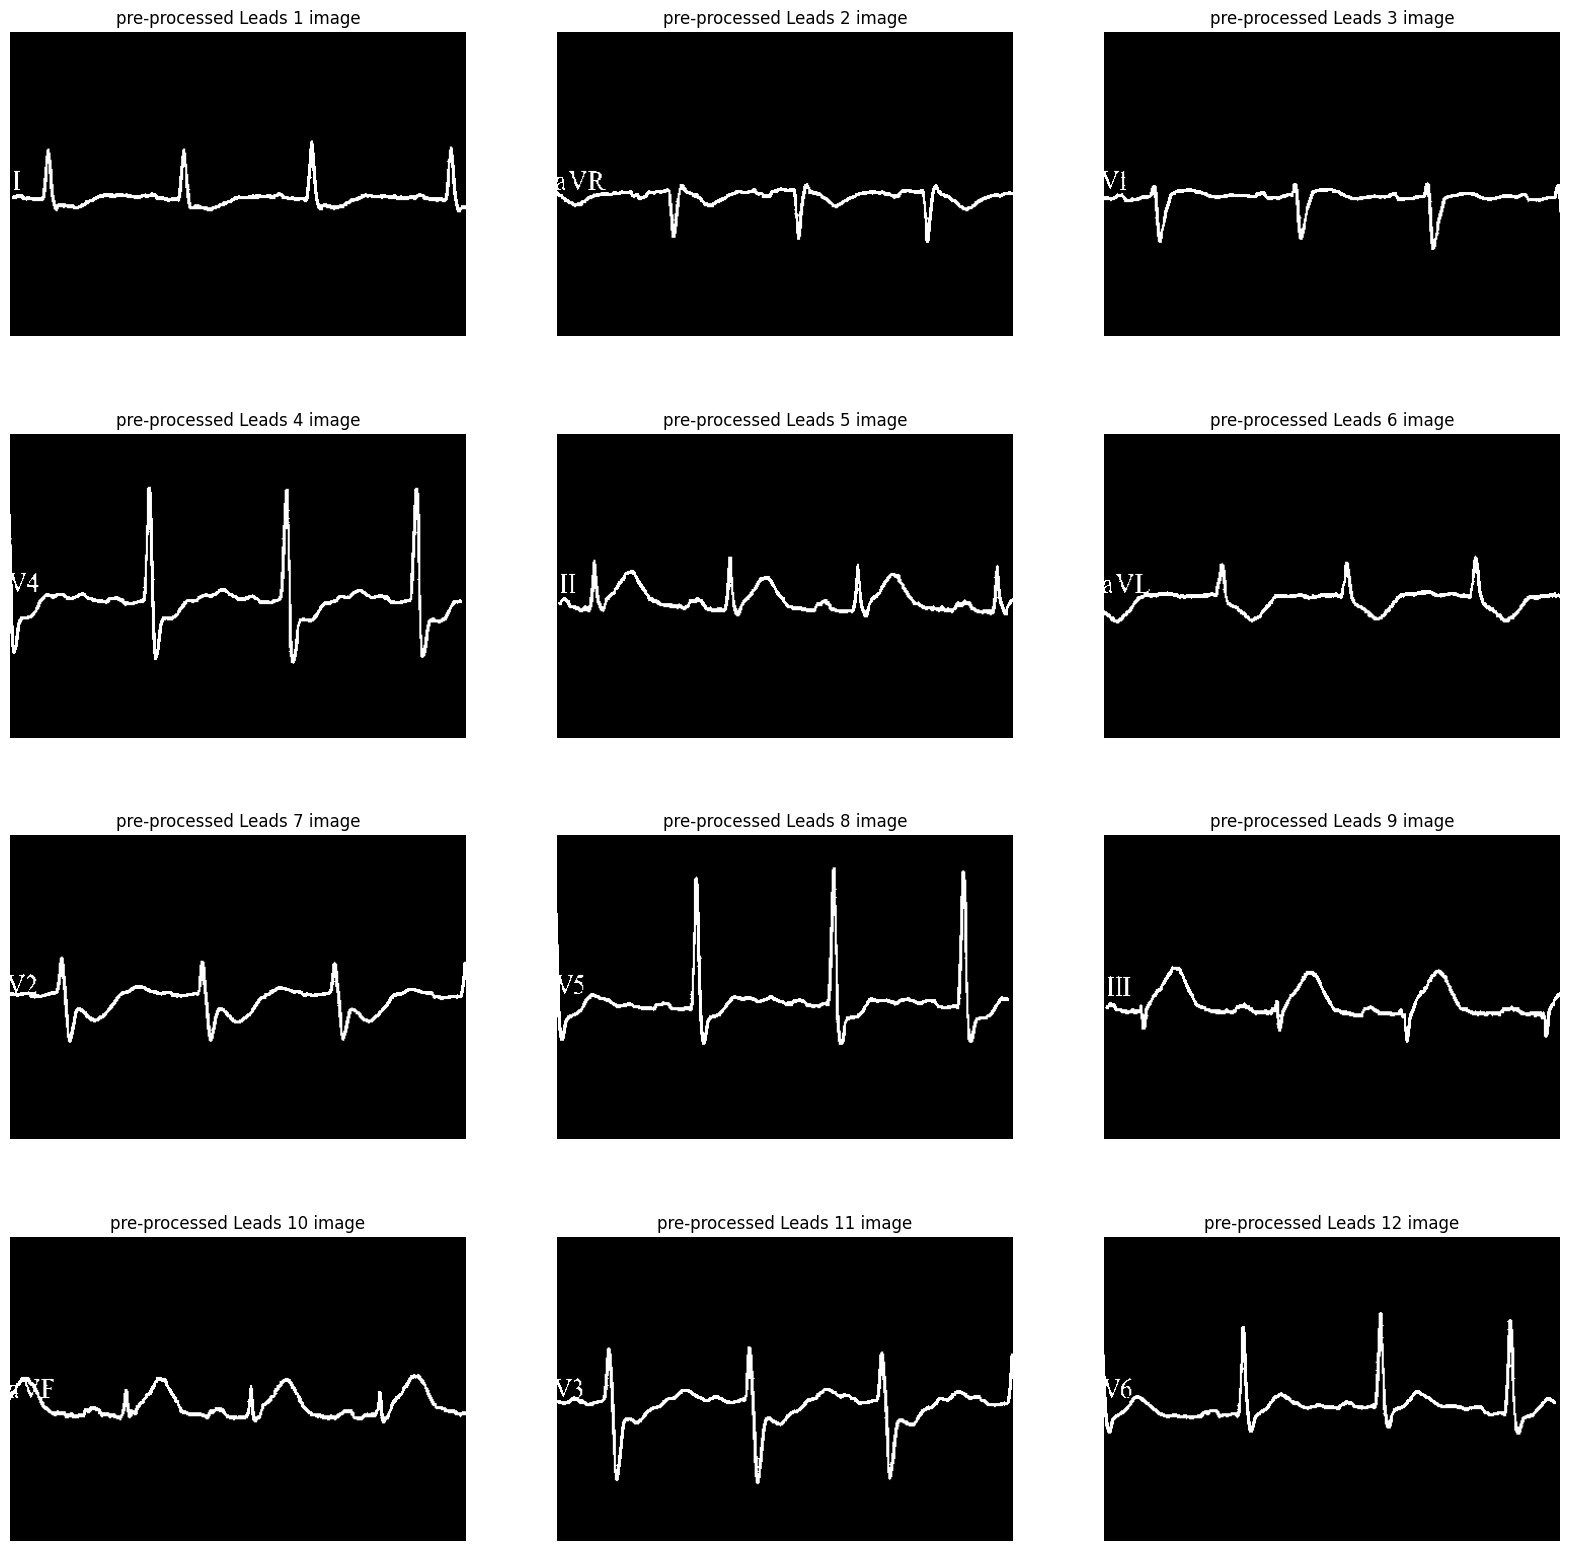

In [ ]:
#importing gaussian filter and otsu threshold
from skimage.filters import threshold_otsu,gaussian
from skimage.transform import resize
from numpy import asarray

#creating subplot of size(4,3) 4 rows and 3 columns
fig2 , ax2 = plt.subplots(4,3)

fig2.set_size_inches(20, 20)

#setting counter for plotting based on value
x_counter=0
y_counter=0

#looping through image list containg all leads from 1-12
for x,y in enumerate(Leads[:len(Leads)-1]):
  #converting to gray scale
  grayscale = color.rgb2gray(y)
  #smoothing image
  blurred_image = gaussian(grayscale, sigma=0.7)
  #thresholding to distinguish foreground and background
  #using otsu thresholding for getting threshold value
  global_thresh = threshold_otsu(blurred_image)

  #creating binary image based on threshold
  binary_global = blurred_image < global_thresh
  #resize image
  binary_global = resize(binary_global, (300, 450))

  if (x+1)%3==0:
    ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
    ax2[x_counter][y_counter].axis('off')
    ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
    x_counter+=1
    y_counter=0
  else:
    ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
    ax2[x_counter][y_counter].axis('off')
    ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
    y_counter+=1

#plot the image
plt.show()

0.557883376398078


(-0.5, 484.5, 299.5, -0.5)

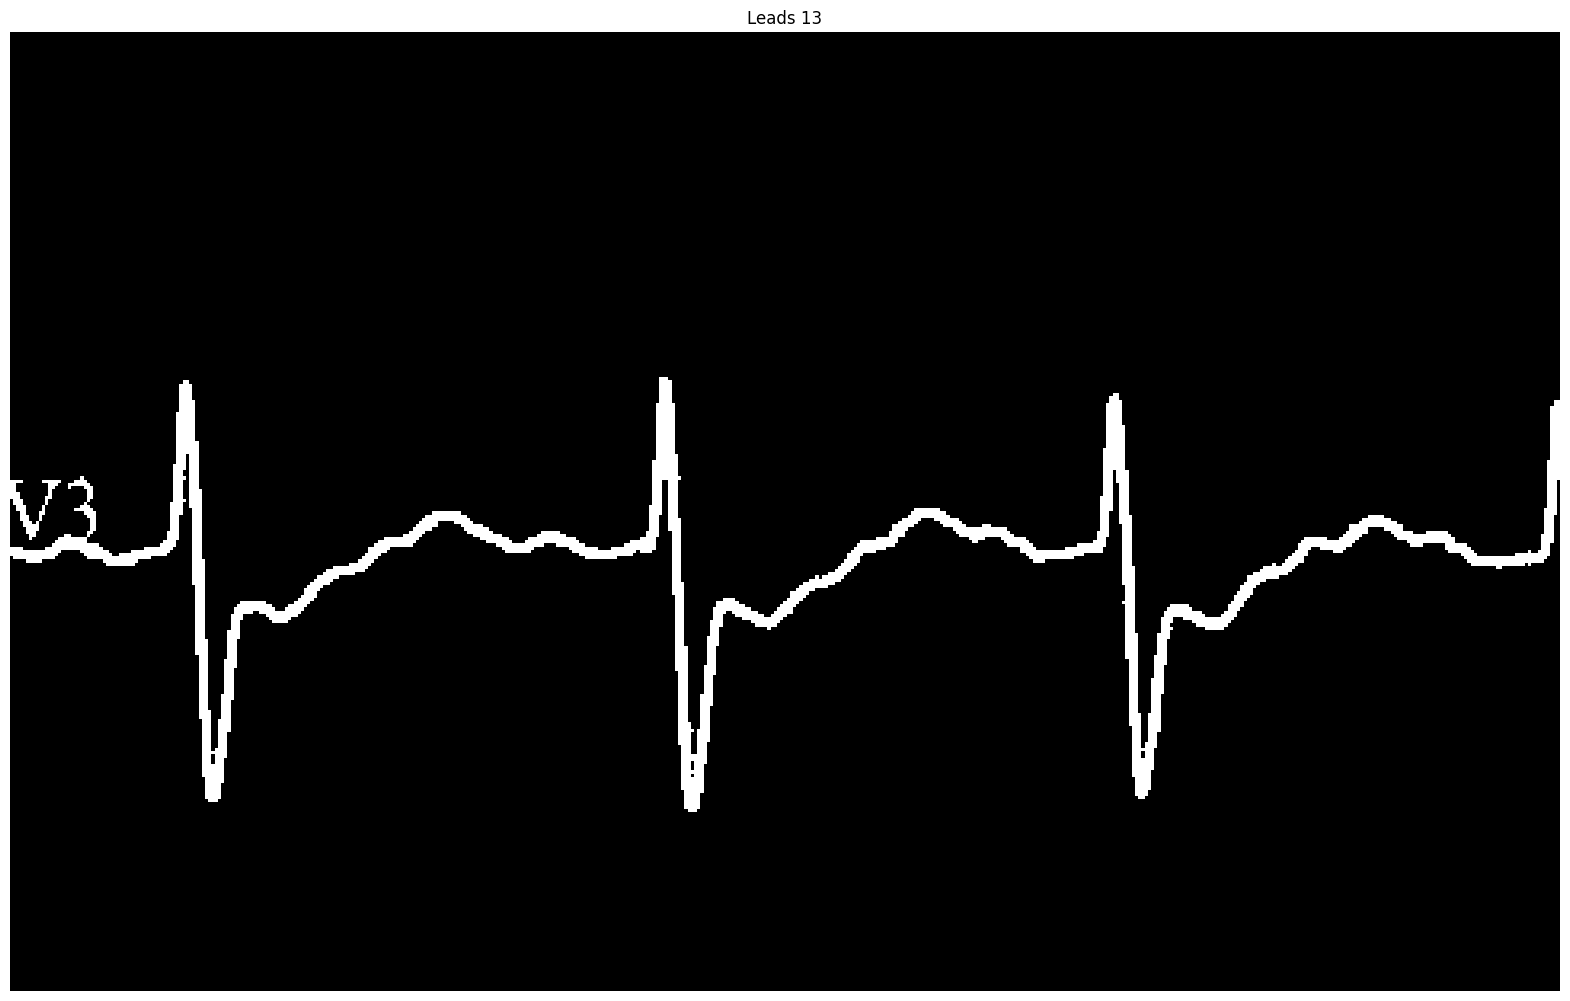

In [ ]:
#plotting lead 13
fig3 , ax3 = plt.subplots()
fig3.set_size_inches(20, 20)

#converting to gray scale
grayscale = color.rgb2gray(Lead_11)
#smoothing image
blurred_image = gaussian(grayscale, sigma=0.7)
#thresholding to distinguish foreground and background
#using otsu thresholding for getting threshold value
global_thresh = threshold_otsu(blurred_image)
print(global_thresh)

#creating binary image based on threshold
binary_global = blurred_image < global_thresh
ax3.imshow(binary_global,cmap='gray')
ax3.set_title("Leads 13")
ax3.axis('off')

#### **PERFROM CONTOURS TO SEPERATE ONLY THE SIGNAL FROM IMAGE**

[(1363, 2)]


Text(0.5, 1.0, 'Sample pre-processed Leads 13 image')

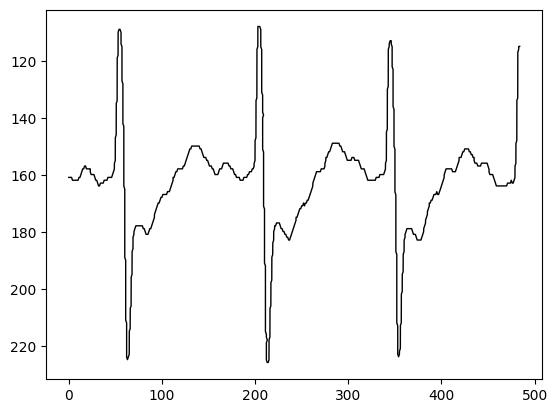

In [ ]:
#import measure
from skimage import measure
import scipy.ndimage as ndimage

#finding contour
contours = measure.find_contours(binary_global,0.9)

# Shows the image with contours found
fig4, ax4 = plt.subplots()

plt.gca().invert_yaxis()

contours_shape = sorted([x.shape for x in contours])[::-1][0:1]
print(contours_shape)
for contour in contours:
  if contour.shape in contours_shape:
    test = resize(contour, (255, 2))
    ax4.plot(contour[:, 1], contour[:, 0],linewidth=1,color='black')
ax1.axis('image')
ax1.set_title("Sample pre-processed Leads 13 image")

In [ ]:
contours_shape = sorted([x.shape for x in contours])[::-1][0:3]
contours_shape

[(1363, 2), (1289, 2), (56, 2)]

In [ ]:
test.shape

(255, 2)

#### **CONVERT IMAGE TO SIGNAL**

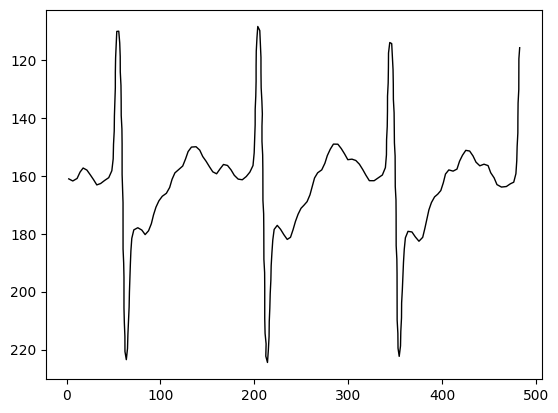

In [ ]:
#converting image to signal

#import pandas
import pandas as pd

#convert contour to dataframe
df = pd.DataFrame(test, columns = ['X','Y'])
fig5, ax5 = plt.subplots()

plt.gca().invert_yaxis()

#plot the image
ax5.plot(df['Y'],df['X'],linewidth=1,color='black',linestyle='solid')

#save the image
fig5.savefig('Lead13_Signal.png')

#### **SAVE SIGNAL TO CSV FORMAT**

In [ ]:
#convert to CSV
df.to_csv('data.csv',index=False)

#View CSV data for verification
test_df=pd.read_csv('data.csv')
test_df

,X,Y
0,161.057782,2.267212
1,161.784869,6.543062
2,160.918484,11.133830
3,158.694908,14.346389
4,157.308923,17.569166
...,...,...
250,134.855764,481.090577
251,130.178380,481.837401
252,124.862799,481.899984
253,119.602446,481.940658


#### **SCALING THE DATA & STORE IN CSV**

In [ ]:
#scaling the data and testing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

fit_transform_data = scaler.fit_transform(df)
Normalized_Scaled=pd.DataFrame(fit_transform_data, columns = ['X','Y'])
Normalized_Scaled

,X,Y
0,0.453541,0.000000
1,0.459809,0.008898
2,0.452340,0.018452
3,0.433172,0.025138
4,0.421223,0.031845
...,...,...
250,0.227661,0.996480
251,0.187339,0.998034
252,0.141514,0.998164
253,0.096166,0.998249


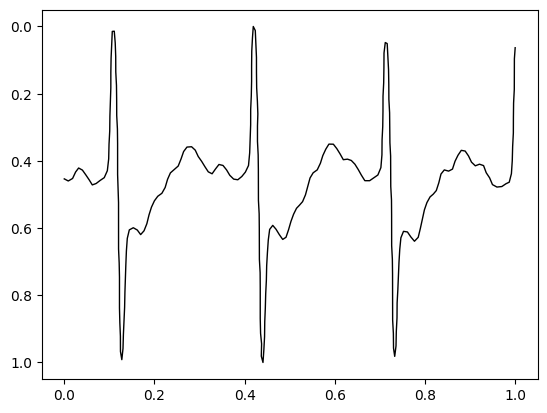

In [ ]:
#plotting scaled data to test signal shape
import pandas as pd

df = pd.DataFrame(Normalized_Scaled, columns = ['X','Y'])

fig6, ax6 = plt.subplots()

plt.gca().invert_yaxis()

ax6.plot(Normalized_Scaled['Y'],Normalized_Scaled['X'],linewidth=1,color='black',linestyle='solid')

In [ ]:
#scaled_data to CSV
Normalized_Scaled.to_csv('scaled_data.csv',index=False)
#reading CSV to test
test_scaled_df=pd.read_csv('scaled_data.csv')
test_scaled_df

,X,Y
0,0.453541,0.000000
1,0.459809,0.008898
2,0.452340,0.018452
3,0.433172,0.025138
4,0.421223,0.031845
...,...,...
250,0.227661,0.996480
251,0.187339,0.998034
252,0.141514,0.998164
253,0.096166,0.998249


In [ ]:
Normalized_Scaled['X']

0      0.453541
1      0.459809
2      0.452340
3      0.433172
4      0.421223
         ...   
250    0.227661
251    0.187339
252    0.141514
253    0.096166
254    0.063250
Name: X, Length: 255, dtype: float64

In [ ]:
# For now save the X axis as a seperate csv file (1D) as it seems to corresponds the high and low points and y axis corresponds to curve/shape.
#scaled_data to CSV
Normalized_Scaled['X'].to_csv('scaled_data_X.csv',index=False)
#reading CSV to test
test_scaled_df_X=pd.read_csv('scaled_data_X.csv')
test_scaled_df_X.shape

(255, 1)

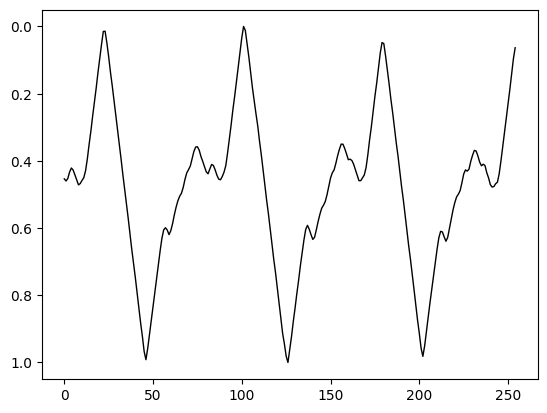

In [ ]:
#plotting 1D signal
import pandas as pd

test_plot_df = pd.DataFrame(test_scaled_df_X, columns = ['X'])
fig6, ax6 = plt.subplots()

plt.gca().invert_yaxis()

ax6.plot(test_plot_df,linewidth=1,color='black',linestyle='solid')

#### **TRANSPOSE THE DATAFRAME**

In [ ]:
#transpose the 1D scaled dataframe
test_transpose = test_scaled_df_X.T
test_transpose

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
X,0.453541,0.459809,0.45234,0.433172,0.421223,0.427417,0.441711,0.456387,0.471512,0.467411,...,0.438201,0.399637,0.357225,0.316942,0.271142,0.227661,0.187339,0.141514,0.096166,0.06325
